link: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Trabalho preços de combustivel



Importar os dados     
Verificar os dados     
Formatar os dados          

comparar os preços por municipios           
Media de preços
Mediana de preços
Soma dos gastos

Exibir no Graficos      
Media         
Mediana    
Soma


Um projeto de aprendizado de máquina em Python utilizando as bibliotecas Pandas, Matplotlib e Scikit-learn. O objetivo é treinar três modelos de aprendizado de máquina (árvore de decisão, regressão logística e vetores de suporte) para prever os melhores preços de combustíveis em cada município do Ceará, a partir de dados disponíveis em um arquivo CSV.

Uma coluna para mostrar os melhores preços e treinou as máquinas para identificar esses preços em cada município. Agora, você pode usar esses modelos para fazer previsões para novos dados e identificar os melhores preços de combustíveis em cada município.

É importante lembrar que o desempenho do modelo pode variar dependendo dos dados utilizados para o treinamento e da escolha dos hiperparâmetros.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#para tratamento dados dados
import pandas as pd
import numpy as np

from scipy import stats

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Accent")
sns.set_style("darkgrid")
import plotly.express as px
import plotly.graph_objects as g


#bibliotecas de inteligencia artificial
from sklearn.linear_model import LogisticRegression  # treinar regressão logistica
from sklearn.tree import DecisionTreeClassifier    # treinar arvore de decisão
from sklearn.svm import SVC                        # treinar maquina de vetores de suporte

# Processamento de dados
from sklearn.preprocessing import LabelEncoder # transforma colunas categoricas em numeros representativos.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder # transformar em binarios para processamento.



In [ ]:

df = pd.read_csv(r'/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/1_semestre/avaliacao_de_desenpenho_de_sistemas_computacionais/Atividade_prof_PAULO/Trabalho_03/Trabalho_03/Dados_csv/precos_semestrais_ceara_2022-01.csv')

In [ ]:
#formatando a tabela

#valores vazio
df.drop(['Coluna1'], axis = 1, inplace=True)
df.drop(['Valor de Compra'], axis = 1, inplace=True)
df.drop(['Complemento'], axis = 1, inplace=True)
df.drop(['Regiao - Sigla'], axis = 1, inplace=True)
df.drop(['Estado - Sigla'], axis = 1, inplace=True)
df.drop(['CNPJ da Revenda'], axis = 1, inplace=True)
df.drop(['Nome da Rua'], axis = 1, inplace=True)
df.drop(['Numero Rua'], axis = 1, inplace=True)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Municipio          19765 non-null  object 
 1   Revenda            19765 non-null  object 
 2   Bairro             19655 non-null  object 
 3   Cep                19765 non-null  object 
 4   Produto            19765 non-null  object 
 5   Data da Coleta     19765 non-null  object 
 6   Valor de Venda     19765 non-null  float64
 7   Unidade de Medida  19765 non-null  object 
 8   Bandeira           19765 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
# Filtrar apenas os dados de gasolina
df_gasolina = df[df['Produto'] == 'GASOLINA']

# Agrupar por município e calcular a média, mediana e soma dos valores de venda
grupo_municipio = df_gasolina.groupby('Municipio')['Valor de Venda'].agg(['mean', 'median', 'sum'])

grupo_municipio.rename(columns={'mean':'media','median':'mediana','sum':'soma'}, inplace=True)

grupo_municipio.media = grupo_municipio.media.round(2)

# Exibir o resultado
print(grupo_municipio)

                   media  mediana      soma
Municipio                                  
CANINDE             7.75     7.78    379.54
CAUCAIA             7.07     7.19   3713.33
CRATEUS             7.88     7.89    867.09
CRATO               7.23     7.39   1786.87
FORTALEZA           7.13     7.29  18678.09
ICO                 7.75     7.75    503.55
IGUATU              7.45     7.64   1728.67
ITAPIPOCA           7.61     7.83   1195.30
JUAZEIRO DO NORTE   7.11     7.14   1856.81
LIMOEIRO DO NORTE   7.58     7.87    947.60
MARACANAU           7.06     7.19   1834.95
QUIXADA             7.01     6.97    441.46
SOBRAL              7.86     7.99   2074.55


In [ ]:
def grafico_linha(titulo, categorias, valores, exibir=True):
    desvio_padrao = valores.std().round(2)
    media = valores.mean().round(2)
    mediana = valores.median().round(2)
    erro = valores.sem().round(2)  # Erro padrão médio

    # Definindo o nível de confiança (95% neste caso)
    confidence_level = 0.95
    graus_de_liberdade = len(valores) - 1

    # Calcular o valor crítico
    t_critical = stats.t.ppf(q=(1 + confidence_level) / 2, df=graus_de_liberdade)

    # Calcular a margem de erro
    margin_of_error = t_critical * erro

    # Calcular o intervalo de confiança
    confidence_interval = (media - margin_of_error).round(2), (media + margin_of_error).round(2)

    # Criando o gráfico de linhas com Plotly Express
    fig = px.line(x=categorias, y=valores, title=titulo, text=valores)
    fig.update_traces(mode='lines+markers+text', textposition='top center')

    # Personalizando o layout do gráfico com Plotly Graph Objects (opcional)
    fig.update_layout(
        xaxis_title='Categorias',
        yaxis_title='Valores',
        hovermode='x',
        template='plotly_white',  # Tema do gráfico (opcional)
        width=1200,  # Largura do gráfico
        height=400,  # Altura do gráfico
        margin=dict(l=20, r=260, t=35, b=20),  # Define as margens
        title_font=dict(size=20, color='black'),  # Estilo do título
        xaxis=dict(title=dict(font=dict(size=14, color='black')), tickfont=dict(color='black')),  # Estilo do eixo X
        yaxis=dict(title=dict(font=dict(size=14, color='black')), tickfont=dict(color='black'))   # Estilo do eixo Y
    )

    if exibir == True:
        # Adicionar texto ao lado do gráfico
        fig.add_annotation(
            text=f'<b>Resultados</b><br> Desvio Padrão: {desvio_padrao}<br> Média: {media}<br> Mediana: {mediana}\
                  <br> Erro padrão médio: {erro}<br> Margin de erro: {margin_of_error.round(3)}<br> Intervalo de confiança: {confidence_interval}',
            xref='paper',  # Posicionamento em relação ao papel (gráfico)
            yref='paper',  # Posicionamento em relação ao papel (gráfico)
            x=1.25,  # Posição horizontal do texto
            y=0.85,   # Posição vertical do texto
            showarrow=False,  # Não exibir seta
            font=dict(size=14, color='black'),  # Tamanho da fonte do texto
            bgcolor='lightblue',  # Cor de fundo azul claro
            borderwidth=1,  # Largura da borda
            align='left',  # Justifica o texto à esquerda

        )

    return fig.show()

In [ ]:
# Soma dos Valores de Venda de Gasolina por Município

def grafico_de_barra(titulo,grupo_municipio,calculo):
    # Criando o gráfico de barras com Plotly Express
    fig = px.bar(grupo_municipio, x=grupo_municipio.index, y= calculo, title=titulo)

    # Adicionando os valores em cima das barras
    fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

    # Personalizando o layout do gráfico com Plotly Graph Objects (opcional)
    fig.update_layout(
        xaxis_title='Município',
        yaxis_title='Mediana do Valor de Venda',
        hovermode='x',
        template='plotly_white',  # Tema do gráfico (opcional)
        width=1000,  # Largura do gráfico
        height=500,  # Altura do gráfico
        font=dict(size=14, color='black')  # Tamanho da fonte do texto
    )

    return fig.show()

In [ ]:
# Filtrar apenas os dados de etanol
df_etanol = df[df['Produto'] == 'ETANOL']

# Agrupar por município e calcular a média, mediana e soma dos valores de venda
grupo_muni_etanol = df_etanol.groupby('Municipio')['Valor de Venda'].agg('sum')

grupo_muni_etanol.name = 'soma'

grafico_de_barra('Soma dos Valores de Etanol por Município',grupo_muni_etanol,'soma')

In [ ]:
# Filtrar apenas os dados de etanol
df_gasolina_aditivada = df[df['Produto'] == 'GASOLINA ADITIVADA']

# Agrupar por município e calcular a média, mediana e soma dos valores de venda
grupo_muni_aditivada = df_gasolina_aditivada.groupby('Municipio')['Valor de Venda'].agg('sum')

grupo_muni_aditivada.name = 'soma'

grafico_de_barra('Soma dos Valores de Gasolina aditivada por Município',grupo_muni_aditivada,'soma')


In [ ]:
grafico_de_barra('Mediana dos Valores de Gasolina por Município',grupo_municipio,'mediana')

In [ ]:
grafico_de_barra('Soma dos Valores de Gasolina por Município',grupo_municipio,'soma')

In [ ]:
grafico_linha('Média dos Valores de Gasolina por Município',grupo_municipio.index, grupo_municipio.media,1)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:


The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.



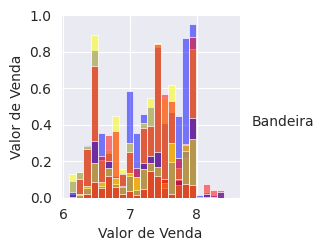

In [ ]:

sns.pairplot(df_gasolina, hue="Bandeira", diag_kind="hist",palette=['red','yellow','blue'])

In [ ]:
df_gasolina.head(10)

,Municipio,Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,62505-650,GASOLINA,1/3/2022,7.12,R$ / litro,ALESAT
7,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,62500-001,GASOLINA,1/3/2022,7.10,R$ / litro,SP
11,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,PARQUE LUZARDO VIANA,61910-000,GASOLINA,1/3/2022,6.77,R$ / litro,IPIRANGA
15,MARACANAU,LUIZA GLAURIA R T MENEZES,KAGADO,61901-410,GASOLINA,1/3/2022,6.47,R$ / litro,VIBRA ENERGIA
18,MARACANAU,POSTO BOTO LTDA,PIRATININGA,61905-000,GASOLINA,1/3/2022,6.75,R$ / litro,RAIZEN
22,MARACANAU,SILVEIRA PETROLEO LTDA,SIQUEIRA II,61901-410,GASOLINA,1/3/2022,6.87,R$ / litro,BRANCA
26,MARACANAU,CAUIPE REVENDEDORA DE PETROLEO LTDA,SIQUEIRA,61901-410,GASOLINA,1/3/2022,6.47,R$ / litro,RAIZEN
30,MARACANAU,LV COMERCIO DE PETROLEO LTDA,CAGADO,61912-000,GASOLINA,1/3/2022,6.75,R$ / litro,BRANCA
34,ITAPIPOCA,DISTRIBUIDORA DE DERIVADOS DE PETROLEO AMONTAD...,DESERTO,62502-974,GASOLINA,1/3/2022,7.11,R$ / litro,SP
38,MARACANAU,POSTO DE COMBUSTIVEL JATOBA LTDA - ME,SIQUEIRA,61900-970,GASOLINA,1/3/2022,6.74,R$ / litro,RAIZEN


In [ ]:
df.head()

,Municipio,Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,62505-650,GASOLINA,1/3/2022,7.12,R$ / litro,ALESAT
1,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,62505-650,ETANOL,1/3/2022,5.96,R$ / litro,ALESAT
2,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,62505-650,GASOLINA ADITIVADA,1/3/2022,7.13,R$ / litro,ALESAT
3,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,62505-650,DIESEL S10,1/3/2022,6.07,R$ / litro,ALESAT
4,ITAPIPOCA,COMERCIAL ITAPIPOQUENSE DE COMBUSTIVEIS LTDA,FAZENDINHA,62500-000,ETANOL,1/3/2022,5.97,R$ / litro,VIBRA ENERGIA


In [ ]:
df.columns

Index(['Municipio', 'Revenda', 'Bairro', 'Cep', 'Produto', 'Data da Coleta',
       'Valor de Venda', 'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [ ]:
nova_tabela = df[['Municipio','Revenda','Bairro','Produto','Data da Coleta','Valor de Venda','Bandeira']]
# nova_tabela1 = pd.pivot_table(nova_tabela, values='Valor de Venda', index='Bandeira', columns='Municipio')
nova_tabela.head(10)



,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor de Venda,Bandeira
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,GASOLINA,1/3/2022,7.12,ALESAT
1,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,ETANOL,1/3/2022,5.96,ALESAT
2,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,GASOLINA ADITIVADA,1/3/2022,7.13,ALESAT
3,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,DIESEL S10,1/3/2022,6.07,ALESAT
4,ITAPIPOCA,COMERCIAL ITAPIPOQUENSE DE COMBUSTIVEIS LTDA,FAZENDINHA,ETANOL,1/3/2022,5.97,VIBRA ENERGIA
5,ITAPIPOCA,COMERCIAL ITAPIPOQUENSE DE COMBUSTIVEIS LTDA,FAZENDINHA,GASOLINA ADITIVADA,1/3/2022,7.13,VIBRA ENERGIA
6,ITAPIPOCA,COMERCIAL ITAPIPOQUENSE DE COMBUSTIVEIS LTDA,FAZENDINHA,DIESEL S10,1/3/2022,6.10,VIBRA ENERGIA
7,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,GASOLINA,1/3/2022,7.10,SP
8,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,ETANOL,1/3/2022,5.97,SP
9,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,GASOLINA ADITIVADA,1/3/2022,7.11,SP


In [ ]:

mediana_preco_municipio = nova_tabela.groupby('Municipio')['Valor de Venda'].median()

menor_preco_municipio = nova_tabela.groupby('Municipio')['Valor de Venda'].min()

max_preco_municipio = nova_tabela.groupby('Municipio')['Valor de Venda'].max()

menor_preco_municipio.head()

Municipio
CANINDE      6.39
CAUCAIA      5.19
CRATEUS      5.19
CRATO        5.00
FORTALEZA    4.75
Name: Valor de Venda, dtype: float64

In [ ]:
# Supondo que nova_tabela seja uma cópia de outro DataFrame
nova_tabela = nova_tabela.copy()

# Usando .loc[] para evitar o SettingWithCopyWarning
nova_tabela.loc[:, 'status'] = nova_tabela.apply(
    lambda row: 'melhor_preco' if row['Valor de Venda'] == menor_preco_municipio[row['Municipio']] else 'barato' if row['Valor de Venda'] <= mediana_preco_municipio[row['Municipio']] else 'caro',
    axis=1
)


In [ ]:
nova_tabela.head()

,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor de Venda,Bandeira,status
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,GASOLINA,1/3/2022,7.12,ALESAT,barato
1,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,ETANOL,1/3/2022,5.96,ALESAT,barato
2,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,GASOLINA ADITIVADA,1/3/2022,7.13,ALESAT,barato
3,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,DIESEL S10,1/3/2022,6.07,ALESAT,barato
4,ITAPIPOCA,COMERCIAL ITAPIPOQUENSE DE COMBUSTIVEIS LTDA,FAZENDINHA,ETANOL,1/3/2022,5.97,VIBRA ENERGIA,barato


#**Gráficos para Métricas**

In [ ]:
# Gráfico de rosca para métricas

import random


def grafico_rosca(nome_metrica,valor_da_metrica):

  def cor_rgb_aleatoria():
    """Gera uma cor RGB aleatória no formato 'rgb(r, g, b)'."""
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return f'rgb({r},{g},{b})'

  cor_aleatoria = cor_rgb_aleatoria()

  # Valor da acurácia
  valor = valor_da_metrica * 100


  # Calcule o tamanho da "rosca"
  rosca_size = 100 - valor

  # Crie um DataFrame com os dados
  data = {'Categoria': [f'{nome_metrica}', ''],
          'Valor': [valor, rosca_size]}
  df = pd.DataFrame(data)

  # Crie o gráfico de pizza com Plotly Express
  fig = px.pie(df, values='Valor',
              names='Categoria',
              hole=0.7,
              color_discrete_sequence=[f'{cor_aleatoria}', 'lightgray'])


  fig.update_traces(textinfo='none',
                    showlegend=False,
                    #marker=dict(line=dict(color='cor', width=2))
                    )

  fig.update_layout(#title='Acurácia',
                    width=550,
                    height=350,
                    )

  fig.add_annotation(x=0.5, y=1.15, text=f'<b>{nome_metrica}</b>', font=dict(color = cor_aleatoria, size=29, family='Arial, sans-serif'), showarrow=False)
  # Adicione o valor da acurácia no centro
  fig.add_annotation(x=0.5, y=0.5, text=f'<b>{valor:.0f}%</b>',font=dict(color= cor_aleatoria, size=32, family='Arial, sans-serif'),  showarrow=False)

  return fig.show()

In [ ]:
class Metricas:

    def __init__(self, real, previsto):
        self.real = pd.Series(real)
        self.previsto = pd.Series(previsto)
        self.classes = self.real.unique()
        self.total = len(self.real.unique())
        self.VP = None
        self.VN = None
        self.FP = None
        self.FN = None

    def multiclass(self):
        amazena_real = pd.DataFrame()
        amazena_previsto = pd.DataFrame()

        for classe in self.classes:
            binaria_real = (self.real == classe).astype(int)
            amazena_real[f'{classe}'] = binaria_real

            binaria_previsto = (self.previsto == classe).astype(int)
            amazena_previsto[f'{classe}'] = binaria_previsto

        return amazena_real, amazena_previsto

    def atribuindo(self):
        amazena_real, amazena_previsto = self.multiclass()

        amazena_real = amazena_real.reset_index(drop=True)
        amazena_previsto = amazena_previsto.reset_index(drop=True)

        self.VP = pd.DataFrame(index=['VP'])
        self.VN = pd.DataFrame(index=['VN'])
        self.FP = pd.DataFrame(index=['FP'])
        self.FN = pd.DataFrame(index=['FN'])

        for classe in self.classes:
            self.VP[f'{classe}'] = sum((amazena_real[f'{classe}'] == 1) & (amazena_previsto[f'{classe}'] == 1)) # Verdadeiro positivo
            self.VN[f'{classe}'] = sum((amazena_real[f'{classe}'] == 0) & (amazena_previsto[f'{classe}'] == 0)) # Verdadeiro negativo
            self.FP[f'{classe}'] = sum((amazena_real[f'{classe}'] == 0) & (amazena_previsto[f'{classe}'] == 1)) # Falso positivo
            self.FN[f'{classe}'] = sum((amazena_real[f'{classe}'] == 1) & (amazena_previsto[f'{classe}'] == 0)) # Falso negativo

        return self.VP, self.VN, self.FP, self.FN

    # Acurácia (Accuracy):
    # Proporção de previsões corretas em relação ao total de previsões.
    def acuracia(self):
        self.atribuindo()
        acuracia = pd.DataFrame()

        for classe in self.classes:
            total = (self.VP[f'{classe}'].values + self.VN[f'{classe}'].values + self.FP[f'{classe}'].values + self.FN[f'{classe}'].values)
            acuracia[f'{classe}'] = (self.VP[f'{classe}'].values + self.VN[f'{classe}'].values) / total
            acuracia[f'{classe}'] = np.where(np.isnan(acuracia[f'{classe}']), 0, acuracia[f'{classe}'])  # Tratamento para NaNs

        acuracia = acuracia.round(2)  # Limita a 2 casas decimais

        return acuracia

    # Precisão (Precision):
    # Proporção de verdadeiros positivos em relação ao total de previsões positivas.
    def precisao(self):
        precision = pd.DataFrame()

        for classe in self.classes:
            denominador = (self.VP[f'{classe}'].values + self.FP[f'{classe}'].values) # Denominador para lidar com a questão de divisão por zero
            precision[f'{classe}'] = np.where(denominador == 0, 0, self.VP[f'{classe}'].values / denominador)
            precision[f'{classe}'] = np.where(np.isnan(precision[f'{classe}']), 0, precision[f'{classe}'])  # Tratamento para NaNs

        precision = precision.round(2)

        return precision

    # Recall (Sensibilidade ou Sensitivity):
    # Proporção de verdadeiros positivos em relação ao total de positivos reais.
    def recall(self):
        recall = pd.DataFrame()

        for classe in self.classes:
            denominador = (self.VP[f'{classe}'].values + self.FN[f'{classe}'].values) # Denominador para lidar com a questão de divisão por zero
            recall[f'{classe}'] = np.where(denominador == 0, 0, self.VP[f'{classe}'].values / denominador)
            recall[f'{classe}'] = np.where(np.isnan(recall[f'{classe}']), 0, recall[f'{classe}'])  # Tratamento para NaNs

        recall = recall.round(2)

        return recall

    def especificidade(self):
        taxa = pd.DataFrame()

        for classe in self.classes:
            denominador = (self.VN[f'{classe}'].values + self.FP[f'{classe}'].values) # Denominador para lidar com a questão de divisão por zero
            taxa[f'{classe}'] = np.where(denominador == 0, 0, self.VN[f'{classe}'].values / denominador)
            taxa[f'{classe}'] = np.where(np.isnan(taxa[f'{classe}']), 0, taxa[f'{classe}'])  # Tratamento para NaNs

        taxa = taxa.round(2)

        return taxa
    # F1-Score:
    # Média harmônica entre precisão e recall. Útil em casos de classes desbalanceadas.
    def f1_score(self):
        precisao = self.precisao()
        recall = self.recall()
        score = pd.DataFrame()

        for classe in self.classes:
            denominador = (precisao[f'{classe}'] + recall[f'{classe}']) # Denominador para lidar com a questão de divisão por zero
            score[f'{classe}'] = np.where(denominador == 0, 0, 2 * ((precisao[f'{classe}'] * recall[f'{classe}']) / denominador))
            score[f'{classe}'] = np.where(np.isnan(score[f'{classe}']), 0, score[f'{classe}'])  # Tratamento para NaNs

        score = score.round(2)

        return score

          # AUC-ROC (Área Sob a Curva ROC):
      # Mede a capacidade do modelo em distinguir entre as classes. Quanto mais próximo de 1, melhor.

      # Matriz de Confusão:
      # Mostra a contagem de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

      # Especificidade (Specificity):
      # Proporção de verdadeiros negativos em relação ao total de negativos reais.

      # Log Loss (Perda Logarítmica):
      # Mede a incerteza das previsões, penalizando previsões menos confiantes.

      # Kappa de Cohen:
      # Avalia a concordância entre as previsões e os valores reais, ajustando para a concordância aleatória.

      # Taxa de Falsos Positivos (False Positive Rate - FPR):
      # Proporção de falsos positivos em relação ao total de negativos reais.


      #  Métricas de Regressão:
      # Erro Médio Absoluto (Mean Absolute Error - MAE):
      # Média das diferenças absolutas entre as previsões e os valores reais.

      # Erro Quadrático Médio (Mean Squared Error - MSE):
      # Média dos quadrados das diferenças entre as previsões e os valores reais. Penaliza erros maiores mais fortemente.

      # Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE):
      # Raiz quadrada do MSE. Mantém as unidades dos valores reais.

    def relatorio(self):
        self.atribuindo()
        real, previsto = self.multiclass()

        acuracia = self.acuracia().T
        precisao = self.precisao().T
        recall = self.recall().T
        especificidade = self.especificidade().T
        f1_score = self.f1_score().T

        rel = pd.DataFrame(index=self.classes, columns=['Acuracia', 'Precisao', 'Recall', 'Especificidade', 'F1_score', 'Qtd_real', 'Qtd_previsto'])
        rel['Acuracia'] = acuracia.values.flatten()
        rel['Precisao'] = precisao.values.flatten()
        rel['Recall'] = recall.values.flatten()
        rel['Especificidade'] = especificidade.values.flatten()
        rel['F1_score'] = f1_score.values.flatten()
        rel['Qtd_real'] = real.sum().values
        rel['Qtd_previsto'] = previsto.sum().values

        rel = rel.sort_index()  # Ordena o DataFrame pelo índice

        return rel

    def matriz_confusao(self):
        self.atribuindo()

        matriz = []
        for classe in self.classes:
            row1 = [self.VP[f'{classe}'].values[0],self.FN[f'{classe}'].values[0]]
            row2 = [self.FP[f'{classe}'].values[0],self.VN[f'{classe}'].values[0]]

            matriz.append([row1, row2])


        return matriz



In [ ]:
import plotly.graph_objects as go
# Cria o mapa de calor

def grafico_matriz_confusao(titulo,df_matriz_confusao):
      fig = px.imshow(df_matriz_confusao,
                    labels=dict(x="Valor Prevista", y="Valor Real", color="Contagem"),
                    x=df_matriz_confusao.columns,  # Rótulos para o eixo x
                    y=df_matriz_confusao.index,  # Rótulos para o eixo y
                    color_continuous_scale="pubu",  # Escolhe uma escala de cores

                    )

      # Adiciona anotações com os valores
      fig.update_traces(text=df_matriz_confusao.values, selector=dict(type='heatmap'))



      # Adiciona os números dentro do mapa de calor
      for i in range(len(df_matriz_confusao.index)):
        for j in range(len(df_matriz_confusao.columns)):

            valor = df_matriz_confusao.iloc[i, j]
            # Texto para cada quadrado
            if((i == 0) and (j == 0)):
                texto = f"Verdadeiro Positivo:<br> {valor}"  # Verdadeiro Positivo
            elif((i == 1) and (j == 1)):
                texto = f"Verdadeiro Negativo:<br> {valor}"  # Verdadeiro Negativo

            elif((i == 0) and (j == 1)):
                texto = f"Falso Negativo:<br> {valor}"  # Falso Negativo

            elif((i == 1) and (j == 0)):
                texto = f"Falso Positivo:<br> {valor}"  # Falso Positivo

            # Adiciona o texto ao gráfico
            fig.add_annotation(
                text=texto,
                x=df_matriz_confusao.columns[j],
                y=df_matriz_confusao.index[i],
                showarrow=False,
                font=dict(color='black', size=14),  # Definindo a cor do texto
                xshift=10,  # Ajusta a posição horizontal do texto
                yshift=10,  # Ajusta a posição vertical do texto
            )

      # Personaliza o layout
      fig.update_layout(
        title=f"Matriz de Confusão {titulo}",
        xaxis_title="Classe Prevista",
        yaxis_title="Classe Real",
        margin=dict(l=50, r=390, t=50, b=20),  # Define as margens
        font=dict(size=14, color='black'),  # Tamanho da fonte do texto
        width=1100,
        height=500,
      )



      # Adicionar texto ao lado do gráfico
      fig.add_annotation(
        text=f'<b>Observação</b><br>É uma medida de<br> desempenho de um modelo<br> preditivo de Machine Learning.<br>\
          Escolhi a classe que teve <br>a maior acurácia<br> das classes. ',
        xref='paper',  # Posicionamento em relação ao papel (gráfico)
        yref='paper',  # Posicionamento em relação ao papel (gráfico)
        x=1.58,  # Posição horizontal do texto
        y=0.85,   # Posição vertical do texto
        showarrow=False,  # Não exibir seta
        font=dict(size=16),  # Tamanho da fonte do texto
        bgcolor='lightblue',  # Cor de fundo azul claro
        #bordercolor='blue',  # Cor da borda
        borderwidth=2,  # Largura da borda

      )


      # Mostra o mapa de calor
      return fig.show()

# **Processamento de dados**

In [ ]:
colunas = ['Municipio', 'Revenda', 'Bairro',  'Valor de Venda', 'Bandeira','status']

In [ ]:
nova_tabela.columns

Index(['Municipio', 'Revenda', 'Bairro', 'Produto', 'Data da Coleta',
       'Valor de Venda', 'Bandeira', 'status'],
      dtype='object')

In [ ]:
# novo dataframe com as coluns sendo selecionadas como o x e depois transformadas em numericos.
df_02 = nova_tabela[['Municipio', 'Revenda', 'Bairro',  'Valor de Venda', 'Bandeira','status']].copy()
df_02 = df_02.astype(str)
transfor = LabelEncoder()


label_encoders = {}

for cols in colunas:
  df_02[cols] = transfor.fit_transform(df_02[cols])


In [ ]:
# Escolhendo o x e o y
x = df_02
y = nova_tabela['Produto'] # a classificação vai da por saber qual combustivel.

In [ ]:
y.unique()

array(['GASOLINA', 'ETANOL', 'GASOLINA ADITIVADA', 'DIESEL S10', 'DIESEL',
       'GNV'], dtype=object)

In [ ]:
# transformando as colunas tipos object em numeros binarios é um preprocessamento
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False,drop='first')
# variavel x_bin é a coluna transformada
x_bin = onehot.fit_transform(df_02)
x_bin



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [ ]:

#separando os dados para trainamento e teste da maquina predentiva
x_treino, x_teste, y_treino, y_teste = train_test_split(x_bin,y, test_size=1/3, random_state=42)


## **Treinando modelos**

# Regressão Logistica

In [ ]:
# Treinando Regressão logistica
modelo_rogisticregression = LogisticRegression(max_iter=1000)   # regressão linear
modelo_rogisticregression.fit(x_treino,y_treino)    # regressão linear
previsao_rogisticregression = modelo_rogisticregression.predict(x_teste)       # regressão logistica

In [ ]:
metrica_logistica = Metricas(y_teste,previsao_rogisticregression)
metrica_logistica.relatorio()

,Acuracia,Precisao,Recall,Especificidade,F1_score,Qtd_real,Qtd_previsto
DIESEL,0.97,0.50,0.35,0.99,0.41,181,126
DIESEL S10,0.76,0.52,0.44,0.87,0.48,1623,1360
ETANOL,0.87,0.70,0.77,0.89,0.73,1575,1744
GASOLINA,0.76,0.51,0.57,0.82,0.54,1632,1796
GASOLINA ADITIVADA,0.79,0.51,0.51,0.86,0.51,1449,1435
GNV,1.00,0.90,0.89,1.00,0.89,129,128


In [ ]:
matriz_confusao_logistica = pd.DataFrame(metrica_logistica.matriz_confusao()[0])
matriz_confusao_logistica

,0,1
0,923,709
1,873,4084


In [ ]:
grafico_matriz_confusao('Classe Diesel, Regressão Logistica',matriz_confusao_logistica)

In [ ]:
media_acuracia_logistica = metrica_logistica.acuracia().T.mean()
media_acuracia_logistica

0    0.858333
dtype: float64

In [ ]:
grafico_rosca('Acurácia Regressão Logistica ',media_acuracia_logistica.sort_values().values[0])

In [ ]:
acuracia_logistica = metrica_logistica.relatorio().Acuracia
acuracia_logistica_colunas = acuracia_logistica.index

In [ ]:
#grafico_linha('Média dos Valores de Venda de Gasolina por Município',grupo_municipio.index, grupo_municipio.media)
grafico_linha('Ácuracia Regressão logistica', acuracia_logistica_colunas,acuracia_logistica,1)

#Arvore de decisão

In [ ]:
# Treinando Árvores de Decisão

# No DecisionTreeClassifier, hiperparâmetros que você pode ajustar incluem:


# min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno.
# min_samples_leaf: O número mínimo de amostras necessárias para ser um nó folha.
# max_features: O número máximo de features a serem consideradas para fazer a divisão em cada nó.
# criterion: A função para medir a qualidade da divisão.
# max_depth: A profundidade máxima da árvore.

modelo_arvoredecisao = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1) # arvore de decisão
modelo_arvoredecisao.fit(x_treino,y_treino)         # arvore de decisão
previsa_arvoredecisao = modelo_arvoredecisao.predict(x_teste)    # arvore de decisão

In [ ]:
metric_arvore = Metricas(y_teste,previsa_arvoredecisao)
metric_arvore.relatorio()

<ipython-input-24-01e1c6ebcdbf>:63: RuntimeWarning:

invalid value encountered in divide

<ipython-input-24-01e1c6ebcdbf>:63: RuntimeWarning:

invalid value encountered in divide



,Acuracia,Precisao,Recall,Especificidade,F1_score,Qtd_real,Qtd_previsto
DIESEL,0.97,0.00,0.00,1.00,0.00,181,0
DIESEL S10,0.77,0.64,0.12,0.98,0.20,1623,301
ETANOL,0.75,0.49,0.94,0.69,0.64,1575,3042
GASOLINA,0.64,0.39,0.75,0.61,0.51,1632,3163
GASOLINA ADITIVADA,0.79,1.00,0.02,1.00,0.04,1449,35
GNV,0.99,1.00,0.37,1.00,0.54,129,48


In [ ]:
media_acuracia_arvore = metric_arvore.acuracia().T.mean()
media_acuracia_arvore

0    0.818333
dtype: float64

In [ ]:
desvio_padrao_acuracia_arvore = metric_arvore.acuracia().T.std()
desvio_padrao_acuracia_arvore

0    0.135708
dtype: float64

In [ ]:
grafico_rosca('Acurácia Modelo Àrvore de Decisão',media_acuracia_arvore.sort_values().values[0])

In [ ]:
acuracia_arvore = metric_arvore.relatorio().Acuracia
acuracia_arvore_colunas = acuracia_arvore.index

<ipython-input-24-01e1c6ebcdbf>:63: RuntimeWarning:

invalid value encountered in divide

<ipython-input-24-01e1c6ebcdbf>:63: RuntimeWarning:

invalid value encountered in divide



In [ ]:
grafico_linha('Ácuracia da árvore de decisão', acuracia_arvore_colunas, acuracia_arvore,1)

In [ ]:
matriz_confusao_arvore = pd.DataFrame(metric_arvore.matriz_confusao()[0])

In [ ]:
grafico_matriz_confusao('Classe Diesel, Árvore de decisão',matriz_confusao_arvore)

In [ ]:

# modelo_maquinavetoressuporte = SVC()    # maquina de vetores de suporte
# modelo_maquinavetoressuporte.fit(x_treino,y_treino) # maquina de vetores de suporte
# previsao_maquinavetoressuporte = modelo_maquinavetoressuporte.predict(x_teste) # maquina de vetores de suporte

In [ ]:
# metricas_previsao_maquinavetoressuporte = Metricas(y_teste, previsao_maquinavetoressuporte)
# metricas_previsao_maquinavetoressuporte.relatorio()

In [ ]:
# # Supondo que y_teste são os rótulos verdadeiros e previsao_rogisticregression são as previsões do seu modelo
# accuracy = classification_report(y_teste, previsao_maquinavetoressuporte)

# print(accuracy)

In [ ]:
# from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_previsao_rogisticregression = accuracy_score(y_teste,previsao_rogisticregression) # regressão logistica
accuracy_arvoredecisao = accuracy_score(y_teste,previsa_arvoredecisao)                   # arvore de decisão



print("Acurácia (Regressão logisitica): {:.2f}%".format(accuracy_previsao_rogisticregression * 100))
print("Acurácia (Árvores de Decisão): {:.2f}%".format(accuracy_arvoredecisao * 100))
#print("Acurácia (Máquina de Vetores de Suporte (SVM))): {:.2f}%".format(accuracy_maquinavetoressuporte * 100))


Acurácia (Regressão logisitica): 57.14%
Acurácia (Árvores de Decisão): 45.18%


Testando novo modelo

In [ ]:
# novo_df = pd.DataFrame({'Municipio': ['MARACANAU'],
#                         'Revenda': ['LUIZA GLAURIA R T MENEZES'],
#                         'Bairro': ['KAGADO'],
#                         'Valor de Venda': 6.47})
# novo_df


In [ ]:
# # Aplicar as mesmas etapas de pré-processamento aos dados da nova planilha
# novo_x = novo_df #.drop('status', axis=1)
# le = LabelEncoder()

# novo_x = novo_x.apply(le.fit_transform)  # Usar o mesmo LabelEncoder aplicado anteriormente

# # codificar as features categóricas
# novo_x_bin = onehot.transform(novo_x)  # Usar o mesmo OneHotEncoder aplicado anteriormente




In [ ]:
# # Fazer previsões nos novos dados
# novo_y_pred = modelo_arvoredecisao.predict(novo_x_bin)


# **Métricas**

In [ ]:
# import pandas as pd
# import numpy as np

# class Metricas:

#     def __init__(self, real, previsto):
#         self.real = real
#         self.previsto = previsto
#         self.classes = self.real.unique()
#         self.VP = None
#         self.VN = None
#         self.FP = None
#         self.FN = None

#     def multiclass(self):
#         amazena_real = pd.DataFrame()
#         amazena_previsto = pd.DataFrame()

#         for classe in self.classes:
#             binaria_real = self.real.copy()
#             binaria_previsto = self.previsto.copy()

#             binaria_real[binaria_real == f'{classe}'] = 1
#             binaria_real[binaria_real != 1] = 0
#             amazena_real[f'{classe}'] = binaria_real

#             binaria_previsto[binaria_previsto == f'{classe}'] = 1
#             binaria_previsto[binaria_previsto != 1] = 0
#             amazena_previsto[f'{classe}'] = binaria_previsto

#         return amazena_real, amazena_previsto

#     def atribuindo(self):
#         amazena_real, amazena_previsto = self.multiclass()

#         self.VP = pd.DataFrame(index=['VP'])
#         self.VN = pd.DataFrame(index=['VN'])
#         self.FP = pd.DataFrame(index=['FP'])
#         self.FN = pd.DataFrame(index=['FN'])

#         for classe in self.classes:
#             self.VP[f'{classe}'] = np.sum((amazena_real[classe] == 1) & (amazena_previsto[classe] == 1))
#             self.VN[f'{classe}'] = np.sum((amazena_real[classe] == 0) & (amazena_previsto[classe] == 0))
#             self.FP[f'{classe}'] = np.sum((amazena_real[classe] == 0) & (amazena_previsto[classe] == 1))
#             self.FN[f'{classe}'] = np.sum((amazena_real[classe] == 1) & (amazena_previsto[classe] == 0))

#         return self.VP, self.VN, self.FP, self.FN

#     def acuracia(self):
#         self.atribuindo()
#         acuracia = pd.DataFrame()

#         for classe in self.classes:
#             total = (self.VP[f'{classe}'].values + self.VN[f'{classe}'].values + self.FP[f'{classe}'].values + self.FN[f'{classe}'].values)
#             acuracia[f'{classe}'] = (self.VP[f'{classe}'].values + self.VN[f'{classe}'].values) / total
#             acuracia[f'{classe}'] = np.where(np.isnan(acuracia[f'{classe}']), 0, acuracia[f'{classe}'])  # Tratamento para NaNs

#         acuracia = acuracia.round(2)  # Limita a 2 casas decimais

#         return acuracia

#     def precisao(self):
#         precision = pd.DataFrame()

#         for classe in self.classes:
#             denominador = (self.VP[f'{classe}'].values + self.FP[f'{classe}'].values) # Denominador para lidar com a questão de divisão por zero
#             precision[f'{classe}'] = np.where(denominador == 0, 0, self.VP[f'{classe}'].values / denominador)
#             precision[f'{classe}'] = np.where(np.isnan(precision[f'{classe}']), 0, precision[f'{classe}'])  # Tratamento para NaNs

#         precision = precision.round(2)

#         return precision

#     def recall(self):
#         recall = pd.DataFrame()

#         for classe in self.classes:
#             denominador = (self.VP[f'{classe}'].values + self.FN[f'{classe}'].values) # Denominador para lidar com a questão de divisão por zero
#             recall[f'{classe}'] = np.where(denominador == 0, 0, self.VP[f'{classe}'].values / denominador)
#             recall[f'{classe}'] = np.where(np.isnan(recall[f'{classe}']), 0, recall[f'{classe}'])  # Tratamento para NaNs

#         recall = recall.round(2)

#         return recall

#     def especificidade(self):
#         taxa = pd.DataFrame()

#         for classe in self.classes:
#             denominador = (self.VN[f'{classe}'].values + self.FP[f'{classe}'].values) # Denominador para lidar com a questão de divisão por zero
#             taxa[f'{classe}'] = np.where(denominador == 0, 0, self.VN[f'{classe}'].values / denominador)
#             taxa[f'{classe}'] = np.where(np.isnan(taxa[f'{classe}']), 0, taxa[f'{classe}'])  # Tratamento para NaNs

#         taxa = taxa.round(2)

#         return taxa

#     def f1_score(self):
#         precisao = self.precisao()
#         recall = self.recall()
#         score = pd.DataFrame()

#         for classe in self.classes:
#             denominador = (precisao[f'{classe}'] + recall[f'{classe}']) # Denominador para lidar com a questão de divisão por zero
#             score[f'{classe}'] = np.where(denominador == 0, 0, 2 * ((precisao[f'{classe}'] * recall[f'{classe}']) / denominador))
#             score[f'{classe}'] = np.where(np.isnan(score[f'{classe}']), 0, score[f'{classe}'])  # Tratamento para NaNs

#         score = score.round(2)

#         return score

#     def relatorio(self):
#         real, previsto = self.multiclass()

#         self.atribuindo()
#         acuracia = self.acuracia().T
#         precisao = self.precisao().T
#         recall = self.recall().T
#         especificidade = self.especificidade().T
#         f1_score = self.f1_score().T

#         rel = pd.DataFrame(index=self.classes, columns=['Acuracia', 'Precisao', 'Recall', 'Especificidade', 'F1_score', 'Qtd_real', 'Qtd_previsto'])
#         rel['Acuracia'] = acuracia.values.flatten()
#         rel['Precisao'] = precisao.values.flatten()
#         rel['Recall'] = recall.values.flatten()
#         rel['Especificidade'] = especificidade.values.flatten()
#         rel['F1_score'] = f1_score.values.flatten()
#         rel['Qtd_real'] = real[real==1].count().values
#         rel['Qtd_previsto'] = previsto[previsto==1].count().values

#         rel = rel.sort_index()  # Ordena o DataFrame pelo índice

#         return rel
